In [ ]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import wordcloud as wc
import nltk
from nltk.corpus import stopwords
from IPython.display import clear_output
from textblob import TextBlob
from scipy import stats
import nltk
nltk.download('punkt')
nltk.download('movie_reviews')
warnings.filterwarnings('ignore', message='Unverified HTTPS request')
pd.options.display.float_format = '{:,.4f}'.format
pd.options.mode.chained_assignment = None
# !!nltk --> ngramas
#https://www.kaggle.com/code/abonaplata/analisis-exploratorio-de-datos-con-python/notebook#2.-An%C3%A1lisis-univariable:-'SalePrice'
#https://pharos.sh/analisis-de-sentimientos-en-python-con-textblob/
#https://neuraldojo.org/proyectos/analisis-de-sentimiento/guia-basica-de-analisis-de-sentimiento-en-python/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


# Best sellers

### Colombia

In [ ]:
base_co = pd.read_excel('base_co.xlsx')
reviews_co = pd.read_excel('reviews_co.xlsx')
base_co = base_co[['id', 'title', 'price', 'original_price', 'sold_quantity',
       'Marca', 'Condición del ítem', 'Modelo', 'free_shipping', 'rating',
       'from_trend']].drop_duplicates()
base_co

,id,title,price,original_price,sold_quantity,Marca,Condición del ítem,Modelo,free_shipping,rating,from_trend
0,MCO895993908,Apple iPhone XR 64 Gb - Negro,1490000,NaN,5,Apple,Usado,iPhone XR,1,0.0000,1
1,MCO833291708,iPhone 8 Plus 64 Gb,1690000,NaN,3,Apple,Usado,iPhone 8 Plus,1,0.0000,1
2,MCO631096652,iPhone 11 128gb 4 Meses De Uso Factura Garantí...,2450000,NaN,5,Apple,Usado,iPhone 11,1,0.0000,1
3,MCO619665609,iPhone 7 Plus 128gb 6 Meses De Uso Factura Gar...,1200000,NaN,2,Apple,Usado,iPhone 7 Plus,0,0.0000,1
4,MCO634254280,iPhone SE Red 64gb Uso 2 Meses Factura Garanti...,1350000,NaN,2,Apple,Usado,iPhone SE (2nd Generation),0,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
13240,MCO824231826,iPhone 8 64gb Celular Usado 5/5,829900,NaN,5,Apple,Usado,iPhone 8,1,0.0000,0
13241,MCO617198289,Cajas iPhone 6s Con Manuales En Perfecto Estado,45000,NaN,1,Apple,Usado,iPhone 6s,0,0.0000,0
13242,MCO877632648,"iPhone 11 Pro Max 256gb Con Detalle Leer, Poco...",3200000,NaN,0,Apple,Usado,iPhone 11 Pro Max,0,0.0000,0
13243,MCO631092733,iPhone 11 128gb Como Nuevo Poco Uso Factur Gar...,2450000,NaN,2,Apple,Usado,iPhone 11,1,0.0000,0


In [ ]:
reviews_co = reviews_co[['id', 'reviewable_object', 'date_created', 'status',
       'title', 'content', 'rate', 'valorization', 'likes', 'dislikes',
       'reviewer_id', 'buying_date', 'relevance', 'forbidden_words']]
ids = reviews_co['reviewer_id'].drop_duplicates()
brand = []
for i in range(len(reviews_co['reviewable_object'])):
    brand.append({"reviewable_object": reviews_co['reviewable_object'][i], "Marca":base_co[base_co['id']==reviews_co['reviewable_object'][i]]['Marca'].tolist()[0]})
brand=pd.DataFrame(brand).drop_duplicates()
reviews_co = reviews_co.merge(brand, on="reviewable_object", how="left")
reviews_co.head(5)

,id,reviewable_object,date_created,status,title,content,rate,valorization,likes,dislikes,reviewer_id,buying_date,relevance,forbidden_words,Marca
0,151447302,MCO875830062,2022-08-08T21:09:04Z,published,Poco recomendable. Peor que sus antecesores.,"Este celular es malísimo, me arrepiento de hab...",1,-1,5,6,4101125,2022-05-03T17:14:46Z,54,0,Xiaomi
1,148555735,MCO875830062,2022-07-08T14:57:03Z,published,Excelente,"Una excelente compra, llevo ya más de 2 semana...",5,0,0,0,115684066,2022-06-16T03:02:36Z,34,20,Xiaomi
2,152160669,MCO875830062,2022-08-16T16:33:14Z,published,Excelente,"Excelente, es mi 2do xiaomi, excelente resoluc...",5,0,0,0,53447378,2022-08-01T03:03:54Z,29,0,Xiaomi
3,141255711,MCO875830062,2022-04-25T19:41:19Z,published,Excelente,"Era lo que esperaba, espero y me dure bastant...",5,-2,4,6,42302814,2022-04-18T01:59:19Z,26,35,Xiaomi
4,148730326,MCO875830062,2022-07-10T18:31:40Z,published,Excelente,Voy por un mes con el celular y hasta el momen...,5,0,0,0,184683638,2022-06-12T17:30:50Z,20,0,Xiaomi


In [ ]:
base_co.groupby('title')['sold_quantity'].sum().to_frame().sort_values(by=['sold_quantity'], ascending=False)

,sold_quantity
title,
Xiaomi Pocophone Poco M4 Pro Dual Sim 128 Gb Power Black 6 Gb Ram,1812
Xiaomi Redmi 9a Dual Sim 32 Gb Gris Granito 2 Gb Ram,1686
Nokia 110 (2019) Dual Sim 32 Mb Negro 32 Mb Ram,1672
Celular Xiaomi Redmi Note 9 Pro 128gb/6 Ram / 64mp + Forro,1000
Xiaomi Pocophone Poco X4 Pro 5g Dual Sim 256 Gb Laser Black 8 Gb Ram,721
...,...
Celular iPhone 8 Plus De 64gb,0
Celular iPhone 8 Plus De 64g,0
Celular iPhone 8 Plus De 64 Gb Negro,0


As we can see, the best-selling cell phone is Xiaomi Pocophone Poco M4 Pro.

# Most searched and best rating

#### Best rating:

### Colombia

In [ ]:
base_trends_co = base_co[base_co['rating']!=0]
base_trends_co.groupby('Marca')['rating'].mean().to_frame().sort_values(by=['rating'], ascending=False).head(10)

,rating
Marca,
LENOVOMOVILIDAD,5.0000
EXHIBIDORES INNOVA,5.0000
Realme,4.9429
Krono,4.8000
iPro,4.8000
Xiaomi,4.7656
Huawei,4.7500
Infinix,4.7000
L8star,4.6500


#### Most searched

In [ ]:
base_buscados_co = base_co
base_buscados_co.groupby('Marca')['from_trend'].sum().to_frame().sort_values(by=['from_trend'], ascending=False).head(10)

,from_trend
Marca,
Apple,5637
Xiaomi,1910
Samsung,1483
Huawei,992
Motorola,986
Generic,169
Realme,135
Google,92
Nokia,83


# Descriptive analytics to determine purchase patterns according to the country, brand, price and other variables.

### Colombia

General information of the columns:

In [ ]:
base_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13245 entries, 0 to 13244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  13245 non-null  object 
 1   title               13245 non-null  object 
 2   price               13245 non-null  int64  
 3   original_price      448 non-null    float64
 4   sold_quantity       13245 non-null  int64  
 5   Marca               13225 non-null  object 
 6   Condición del ítem  13221 non-null  object 
 7   Modelo              13175 non-null  object 
 8   free_shipping       13245 non-null  int64  
 9   rating              13245 non-null  float64
 10  from_trend          13245 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.2+ MB


Analysis of the usefulness of the item condition column:

In [ ]:
base_co['Condición del ítem'].unique()

array(['Usado', 'Nuevo', 'Reacondicionado', nan], dtype=object)

With the count of items per condition, we can see that there is more supply of used products:

In [ ]:
base_co['Condición del ítem'].value_counts().to_frame()

,Condición del ítem
Usado,8566
Nuevo,4556
Reacondicionado,99


However, customers prefer products in new condition:

In [ ]:
base_co.groupby('Condición del ítem')['sold_quantity'].sum().to_frame().sort_values(by=['sold_quantity'], ascending=False).head(10)

,sold_quantity
Condición del ítem,
Nuevo,28356
Usado,401
Reacondicionado,62


Assign numerical values to check later if it has any correlation with the other columns:

In [ ]:
base_co['Condición del ítem'] = base_co['Condición del ítem'].map({'Nuevo': 1, 'Usado': 0, 'Reacondicionado': 2})

In the following table we can see the number of products purchased by brand with the rating them have. It is possible to notice that the most purchased brand is Xiaomi with a high rating and it is followed by Nokia that has a very low price.

In [ ]:
base_trends_co = base_co[base_co['rating']!=0]
print('Total records with rating: '+str(len(base_trends_co)))
base_trends_co.groupby(['Marca']).agg({'sold_quantity':'sum','rating':'mean', 'price':'mean'}).sort_values(by=['sold_quantity', 'rating'], ascending=False).head(10)

Total registros con rating: 155


,sold_quantity,rating,price
Marca,,,
Xiaomi,13215,4.7656,"1,095,967.7778"
Nokia,1672,3.7000,"94,900.0000"
Samsung,1210,4.4833,"1,993,233.3333"
Apple,760,4.6444,"4,780,511.1111"
Realme,603,4.9429,"626,328.5714"
iPro,500,4.8000,"158,333.3333"
Huskee,200,4.3000,"274,900.0000"
BLU,200,3.0000,"84,990.0000"
L8star,150,4.6500,"114,900.0000"


Now let's look at the price column. When making a description, we get a very high maximum value, which could be due to an error in loading the item's attributes. For this, we will remove the outliers later.

In [ ]:
base_co['price'].describe()

count        13,245.0000
mean      1,649,751.6537
std       6,269,602.6313
min           3,000.0000
25%         582,400.0000
50%       1,100,000.0000
75%       2,050,000.0000
max     700,000,000.0000
Name: price, dtype: float64

In [ ]:
base_co.sort_values(by=['price'], ascending=False).head(10)

,id,title,price,original_price,sold_quantity,Marca,Condición del ítem,Modelo,free_shipping,rating,from_trend
12797,MCO507044098,Sony Xperia Pro 5g Xqaq62b 12gb 512gb Dual Sim...,16599000,NaN,0,Sony,1.0000,Pro Dual SIM,1,0.0000,0
2364,MCO507044098,Sony Xperia Pro 5g Xqaq62b 12gb 512gb Dual Sim...,16599000,NaN,0,Sony,1.0000,Pro Dual SIM,1,0.0000,1
13102,MCO851124228,Asus Rog Phone 5s Pro Gaming Zs676ks 18gb 512g...,15999000,NaN,0,Asus,1.0000,ROG Phone 5s Pro ZS676KS,1,0.0000,0
2377,MCO851124228,Asus Rog Phone 5s Pro Gaming Zs676ks 18gb 512g...,15999000,NaN,0,Asus,1.0000,ROG Phone 5s Pro ZS676KS,1,0.0000,1
13068,MCO849371634,Apple iPhone 13 Pro Max A2643 6gb 1tb,15399000,NaN,0,Apple,1.0000,iPhone 13 Pro Max,1,0.0000,0
2468,MCO849371634,Apple iPhone 13 Pro Max A2643 6gb 1tb,15399000,NaN,0,Apple,1.0000,iPhone 13 Pro Max,1,0.0000,1
8829,MCO570746717,Motorola Mc75 Series Mobile Computer,14522800,NaN,0,Motorola,0.0000,MC75 _ Series,1,0.0000,1
13117,MCO846634960,Oppo Find N 5g Peum00 12gb 512gb Dual Sim Duos,14499000,NaN,0,Oppo,1.0000,N Dual SIM,1,0.0000,0
2471,MCO846634960,Oppo Find N 5g Peum00 12gb 512gb Dual Sim Duos,14499000,NaN,0,Oppo,1.0000,N Dual SIM,1,0.0000,1
2390,MCO590316522,Apple iPhone 12 Pro Max A2412 6gb 512gb Dual S...,14399000,NaN,0,Apple,1.0000,iPhone 12 Pro Max,1,0.0000,1


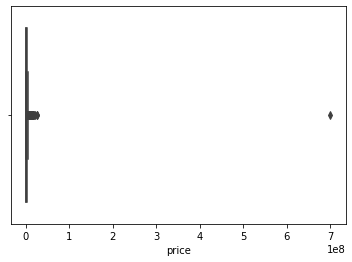

In [ ]:
sns.boxplot(x=base_co['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


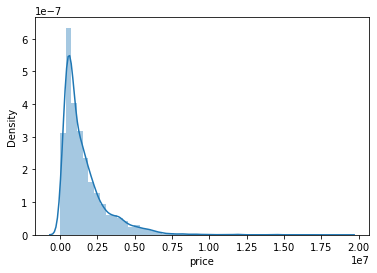

In [ ]:
sns.distplot(base_co['price']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


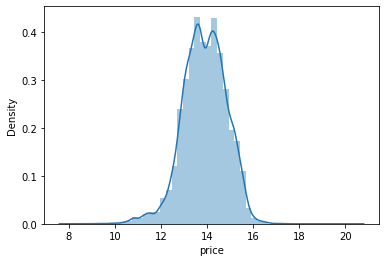

In [ ]:
log_transformed = np.log(base_co['price'])
sp_transformed = sns.distplot(log_transformed)

In [ ]:
print("Asymmetry: %f" % base_co['price'].skew())
print("Kurtosis: %f" % base_co['price'].kurt())

Asimetría: 2.571420
Curtosis: 11.408894


Eliminate outliers

In [ ]:
z= stats.zscore(log_transformed)
base_co = base_co[(z < 3)]

In [ ]:
base_co['price'].describe()

count       13,240.0000
mean     1,590,684.6415
std      1,532,125.1620
min          3,000.0000
25%        580,000.0000
50%      1,100,000.0000
75%      2,050,000.0000
max     16,599,000.0000
Name: price, dtype: float64

We see the price with a better distribution, and although there are still many different prices, we can see that there is a concentration in values close to 1,600,000

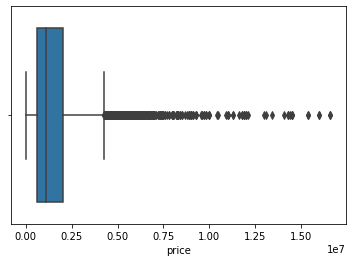

In [ ]:
sns.boxplot(x=base_co['price'])

In [ ]:
base_co.sort_values(by=['price'], ascending=False).head(10)

,id,title,price,original_price,sold_quantity,Marca,Condición del ítem,Modelo,free_shipping,rating,from_trend
12797,MCO507044098,Sony Xperia Pro 5g Xqaq62b 12gb 512gb Dual Sim...,16599000,NaN,0,Sony,Nuevo,Pro Dual SIM,1,0.0000,0
2364,MCO507044098,Sony Xperia Pro 5g Xqaq62b 12gb 512gb Dual Sim...,16599000,NaN,0,Sony,Nuevo,Pro Dual SIM,1,0.0000,1
13102,MCO851124228,Asus Rog Phone 5s Pro Gaming Zs676ks 18gb 512g...,15999000,NaN,0,Asus,Nuevo,ROG Phone 5s Pro ZS676KS,1,0.0000,0
2377,MCO851124228,Asus Rog Phone 5s Pro Gaming Zs676ks 18gb 512g...,15999000,NaN,0,Asus,Nuevo,ROG Phone 5s Pro ZS676KS,1,0.0000,1
13068,MCO849371634,Apple iPhone 13 Pro Max A2643 6gb 1tb,15399000,NaN,0,Apple,Nuevo,iPhone 13 Pro Max,1,0.0000,0
2468,MCO849371634,Apple iPhone 13 Pro Max A2643 6gb 1tb,15399000,NaN,0,Apple,Nuevo,iPhone 13 Pro Max,1,0.0000,1
8829,MCO570746717,Motorola Mc75 Series Mobile Computer,14522800,NaN,0,Motorola,Usado,MC75 _ Series,1,0.0000,1
13117,MCO846634960,Oppo Find N 5g Peum00 12gb 512gb Dual Sim Duos,14499000,NaN,0,Oppo,Nuevo,N Dual SIM,1,0.0000,0
2471,MCO846634960,Oppo Find N 5g Peum00 12gb 512gb Dual Sim Duos,14499000,NaN,0,Oppo,Nuevo,N Dual SIM,1,0.0000,1
2390,MCO590316522,Apple iPhone 12 Pro Max A2412 6gb 512gb Dual S...,14399000,NaN,0,Apple,Nuevo,iPhone 12 Pro Max,1,0.0000,1


Now we continue with the analysis of correlations. The only variables that come close to having a correlation are the number of sales with the rating, however, in this case it is not relevant since most products do not have a rating (they only have 155 out of 13245).

In [ ]:
base_num = base_co.select_dtypes(include = ['float64', 'int64'])
base_num.corr()

,price,original_price,sold_quantity,Condición del ítem,free_shipping,rating,from_trend
price,1.0000,0.9772,-0.0368,0.1883,0.1120,-0.0250,0.0015
original_price,0.9772,1.0000,-0.0754,0.1149,NaN,-0.0297,0.0124
sold_quantity,-0.0368,-0.0754,1.0000,0.1289,0.0622,0.6019,-0.1398
Condición del ítem,0.1883,0.1149,0.1289,1.0000,0.4448,0.1405,-0.3512
free_shipping,0.1120,NaN,0.0622,0.4448,1.0000,0.0644,-0.1659
rating,-0.0250,-0.0297,0.6019,0.1405,0.0644,1.0000,-0.1590
from_trend,0.0015,0.0124,-0.1398,-0.3512,-0.1659,-0.1590,1.0000


Here we can see a scatter chart that shows the accumulation of products sold in rating 0, since they have no rating

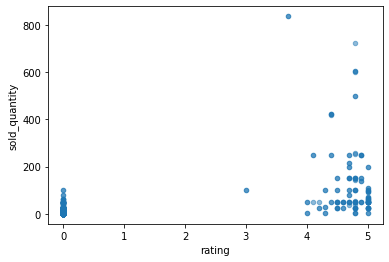

In [ ]:
data = pd.concat([base_co['sold_quantity'], base_co['rating']], axis=1)
data.plot.scatter(x='rating', y='sold_quantity', alpha = 0.5)

In [ ]:
data = pd.concat([base_co['sold_quantity'], base_co['price']], axis=1)

We see that most of the products have free shipping, however, it is interesting to note that there are 3951 products without this feature since normally when exceeding an amount, the product has free shipping.

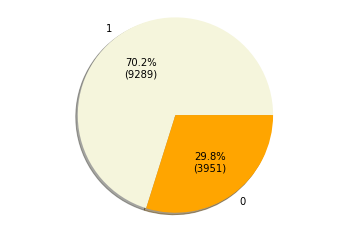

In [ ]:
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ("beige", "orange")

base_co['free_shipping'].value_counts(ascending=False).to_frame()
data = base_co['free_shipping'].value_counts()
plt.pie(data, labels=base_co['free_shipping'].unique(), colors=colors, shadow=True,autopct= lambda pct: func(pct, data))
plt.axis("equal")
plt.show()

As we can see, if there are high-priced products that do not have free shipping

In [ ]:
base_co['Condición del ítem'] = base_co['Condición del ítem'].map({1:'Nuevo', 0:'Usado', 2: 'Reacondicionado'})

In [ ]:
base_co[base_co['free_shipping']==0].sort_values(by=['price'], ascending=False).head(10)

,id,title,price,original_price,sold_quantity,Marca,Condición del ítem,Modelo,free_shipping,rating,from_trend
8383,MCO921791735,iPhone 8plus,13000000,NaN,0,Apple,Usado,iPhone 8 Plus,0,0.0000,1
5652,MCO926889153,iPhone 13 Pro Max 1tb Color Grafito,9000000,NaN,0,Apple,Nuevo,iPhone 13 Pro Max,0,0.0000,1
5745,MCO949384475,iPhone 13 Pro Max,8500000,NaN,0,Apple,Usado,iPhone 13 Pro Max,0,0.0000,1
5762,MCO947079133,iPhone 13 Pro Max,7500000,NaN,0,Apple,Usado,iPhone 13 Pro Max,0,0.0000,1
5723,MCO923986592,Celular iPhone 13 Pro Max,6800000,NaN,0,Apple,Usado,iPhone 13 Pro Max,0,0.0000,1
12030,MCO461045855,"iPhone 6,16gb, Gris, Usado Libre A Todo Operador",6600000,NaN,0,Apple,Usado,iPhone 6,0,0.0000,1
194,MCO657219319,Celular iPhone 12 Y iPhone 11,6500000,NaN,0,Apple,Usado,iPhone 12,0,0.0000,1
5721,MCO941236950,Combo iPhone 13 Pro Max 128 Gb Grafito + AirPo...,6000000,NaN,0,Apple,Usado,iPhone 13 Pro Max,0,0.0000,1
5678,MCO949679981,iPhone 13 Pro Max 128 Gb Plateado,5800000,NaN,0,Apple,Nuevo,iPhone 13 Pro Max,0,0.0000,1
5761,MCO943923055,iPhone 13 Pro Max 128gb Grafito,5650000,NaN,0,Apple,Usado,iPhone 13 Pro Max,0,0.0000,1


Products without free shipping are mostly used.

In [ ]:
base_co[base_co['free_shipping']==0].groupby(['Condición del ítem']).agg({'id':'count', 'sold_quantity':'sum'}).sort_values(by=['id'], ascending=False)

,id,sold_quantity
Condición del ítem,,
Usado,3860,232
Nuevo,72,283
Reacondicionado,6,0


Taking into account the Samsung and Huawei brands, we have that the majority of purchases are from the Samsung brand:

In [ ]:
base_co.query('Marca=="Samsung" | Marca=="Huawei"').groupby('Marca')['sold_quantity'].sum().to_frame().sort_values(by=['sold_quantity'], ascending=False).head(10)

,sold_quantity
Marca,
Samsung,3428
Huawei,352


In [ ]:
base_co.query('Marca=="Samsung" | Marca=="Huawei"').groupby(['Marca', 'Condición del ítem'])['sold_quantity'].sum().to_frame().sort_values(by=['sold_quantity'], ascending=False).head(10)

,,sold_quantity
Marca,Condición del ítem,
Samsung,Nuevo,3298
Huawei,Nuevo,312
Samsung,Usado,73
Huawei,Usado,40
Samsung,Reacondicionado,0


The Xiami brand is the most purchased, followed by one of our target brands, Samsung

In [ ]:
base_co.groupby(['Marca'])['sold_quantity'].sum().to_frame().sort_values(by=['sold_quantity'], ascending=False).head(10)

,sold_quantity
Marca,
Xiaomi,15641
Samsung,3428
Nokia,2323
Apple,1605
iPro,877
Realme,782
Motorola,596
ZTE,409
Huawei,352


Here we can see the best selling model for each of our target brands: A32 Dual SIM and Huawei nova 9 SE

In [ ]:
model = base_co.query('Marca=="Samsung" | Marca=="Huawei"').groupby(['Modelo', 'Marca']).agg({'price':'mean', 'sold_quantity':'sum'}).sort_values(by=['sold_quantity'], ascending=False)
model.head(20)

,,price,sold_quantity
Modelo,Marca,,
A32 Dual SIM,Samsung,"944,733.2667",876
A13 Dual SIM,Samsung,"732,961.5385",387
A52 Dual SIM,Samsung,"1,274,830.0000",351
A52,Samsung,"1,329,129.9000",222
A03,Samsung,"497,168.6667",188
HUAWEI nova 9 SE,Huawei,"1,299,900.0000",150
A53 5G Dual SIM,Samsung,"1,512,976.3333",132
A03 Dual SIM,Samsung,"508,360.5556",117
A52 Duos,Samsung,"1,319,900.0000",100


# Review the comments left by users and determine the sentiment (Positive-Negative-Neutral) for each brand

In [ ]:
reviews_co.head()

,id,reviewable_object,date_created,status,title,content,rate,valorization,likes,dislikes,reviewer_id,buying_date,relevance,forbidden_words,Marca
0,151447302,MCO875830062,2022-08-08T21:09:04Z,published,Poco recomendable. Peor que sus antecesores.,"Este celular es malísimo, me arrepiento de hab...",1,-1,5,6,4101125,2022-05-03T17:14:46Z,54,0,Xiaomi
1,148555735,MCO875830062,2022-07-08T14:57:03Z,published,Excelente,"Una excelente compra, llevo ya más de 2 semana...",5,0,0,0,115684066,2022-06-16T03:02:36Z,34,20,Xiaomi
2,152160669,MCO875830062,2022-08-16T16:33:14Z,published,Excelente,"Excelente, es mi 2do xiaomi, excelente resoluc...",5,0,0,0,53447378,2022-08-01T03:03:54Z,29,0,Xiaomi
3,141255711,MCO875830062,2022-04-25T19:41:19Z,published,Excelente,"Era lo que esperaba, espero y me dure bastant...",5,-2,4,6,42302814,2022-04-18T01:59:19Z,26,35,Xiaomi
4,148730326,MCO875830062,2022-07-10T18:31:40Z,published,Excelente,Voy por un mes con el celular y hasta el momen...,5,0,0,0,184683638,2022-06-12T17:30:50Z,20,0,Xiaomi


We choose the brands of interest:

In [ ]:
reviews_co['Marca'].unique()
reviews_co = reviews_co.query('Marca=="Samsung" | Marca=="Huawei"')

array(['Samsung', 'Huawei'], dtype=object)

In [ ]:
reviews_co['sentiment'] = reviews_co['rate'].apply(lambda rating: +1 if rating > 3 else -1)
for i in range(len(reviews_co)):
  if reviews_co['rate'].iloc[i] == 3:
    reviews_co['sentiment'].iloc[i] = 0

In [ ]:
# split the df into positive and negative
positive = reviews_co[reviews_co['sentiment'] == 1]
neutro = reviews_co[reviews_co['sentiment'] == 0]
negative = reviews_co[reviews_co['sentiment'] == -1]

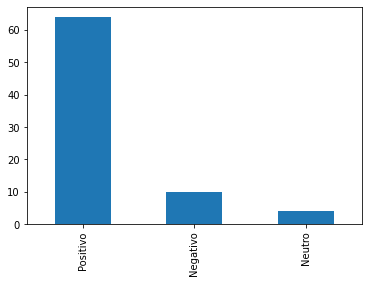

In [ ]:
reviews_co['sentimentt'] = reviews_co['sentiment'].replace({-1 : 'Negativo'})
reviews_co['sentimentt'] = reviews_co['sentimentt'].replace({0 : 'Neutro'})
reviews_co['sentimentt'] = reviews_co['sentimentt'].replace({1 : 'Positivo'})
reviews_co['sentimentt'].value_counts().plot(kind='bar')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


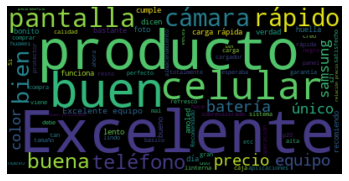

In [ ]:
nltk.download("stopwords")
stopwords = set(stopwords.words('spanish', 'english'))
stopwords.update(["br", "href"])
text = " ".join(review for review in reviews_co['content'].astype(str))
wordcloud = wc.WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
negative

,id,reviewable_object,date_created,status,title,content,rate,valorization,likes,dislikes,reviewer_id,buying_date,relevance,forbidden_words,Marca,sentiment,sentimentt
35,152887493,MCO609808122,2022-08-23T17:25:41Z,published,Estafa,Peligro por favor no comprar a esta persona. E...,1,1,1,0,67174561,2022-01-10T22:14:49Z,22,70,Samsung,-1,-1
106,128655002,MCO604757507,2021-12-15T22:13:15Z,published,Muy malo,Realmente tenía otra opinión hacerca del produ...,1,5,20,15,229247265,2021-07-18T03:02:26Z,82,0,Samsung,-1,-1
188,129066321,MCO620979259,2021-12-20T02:50:44Z,published,Muy malo,"Un equipo sobrevalorado, la cámara es pésima, ...",1,3,5,2,31647800,2021-11-19T17:59:36Z,68,0,Samsung,-1,-1
189,147082454,MCO620979259,2022-06-23T14:26:30Z,published,Pésimo para lo que cuesta.,"Un teléfono extremadamente sobrevalorado, la c...",1,0,0,0,31647800,2021-11-19T17:59:36Z,34,0,Samsung,-1,-1
236,140010297,MCO620979483,2022-04-12T17:16:44Z,published,Problema de Fábrica,"El teléfono, no está mal. Pero tiene un defect...",2,1,2,1,16834643,2022-01-24T22:26:37Z,66,0,Samsung,-1,-1
468,152887493,MCO609808122,2022-08-23T17:25:41Z,published,Estafa,Peligro por favor no comprar a esta persona. E...,1,1,1,0,67174561,2022-01-10T22:14:49Z,22,70,Samsung,-1,-1
558,129066321,MCO620979259,2021-12-20T02:50:44Z,published,Muy malo,"Un equipo sobrevalorado, la cámara es pésima, ...",1,3,5,2,31647800,2021-11-19T17:59:36Z,68,0,Samsung,-1,-1
559,147082454,MCO620979259,2022-06-23T14:26:30Z,published,Pésimo para lo que cuesta.,"Un teléfono extremadamente sobrevalorado, la c...",1,0,0,0,31647800,2021-11-19T17:59:36Z,34,0,Samsung,-1,-1
611,140010297,MCO620979483,2022-04-12T17:16:44Z,published,Problema de Fábrica,"El teléfono, no está mal. Pero tiene un defect...",2,1,2,1,16834643,2022-01-24T22:26:37Z,66,0,Samsung,-1,-1
635,128655002,MCO604757507,2021-12-15T22:13:15Z,published,Muy malo,Realmente tenía otra opinión hacerca del produ...,1,5,20,15,229247265,2021-07-18T03:02:26Z,82,0,Samsung,-1,-1


In [ ]:
positive

,id,reviewable_object,date_created,status,title,content,rate,valorization,likes,dislikes,reviewer_id,buying_date,relevance,forbidden_words,Marca,sentiment,sentimentt
33,105544982,MCO609808122,2021-05-10T21:00:23Z,published,Mejor relación calidad precio entre los s21,"El celular funciona perfecto, me parece el más...",5,3,4,1,70642735,2021-04-23T04:00:00Z,43,0,Samsung,1,Positivo
34,133823557,MCO609808122,2022-02-04T15:12:22Z,published,Un muy buen teléfono,Es veloz y tiene muy buena cobertura. Lo amo. ...,5,1,1,0,474819217,2022-01-09T18:39:17Z,29,0,Samsung,1,Positivo
36,127660107,MCO609808122,2021-12-06T14:39:01Z,published,Excelente teléfono,"Producto es el ofertado, nuevo en su caja, tel...",5,0,0,0,61847423,2021-12-03T05:11:59Z,17,0,Samsung,1,Positivo
37,134127793,MCO609808122,2022-02-08T01:44:52Z,published,Excelente,Muy bueno. Carga muy rápida las cámaras excele...,5,0,0,0,112522670,2022-01-24T19:59:49Z,14,0,Samsung,1,Positivo
107,102258719,MCO604757507,2021-04-11T16:19:18Z,published,Hebdndnsnecele te bendiga y,Exelente producto de la foto de perfil de.,5,-2,0,2,404331444,2021-03-30T04:00:00Z,8,0,Samsung,1,Positivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,28566007,MCO462898407,2018-05-26T20:51:44Z,published,"Muy contento con la compra, era lo que esperaba",El celular p20 pro es de color negro y tiene m...,5,5,14,9,19987373,2018-04-30T04:00:00Z,27,0,Huawei,1,Positivo
717,29254683,MCO462898407,2018-06-11T17:49:48Z,published,Excelente,El color era el que yo quería: negro. El tamañ...,5,-13,14,27,30468084,2018-05-03T04:00:00Z,46,35,Huawei,1,Positivo
718,32029454,MCO462898407,2018-08-10T20:35:00Z,published,Excelente,Es una excel te maquina y su sistema de cámara...,5,0,1,1,214275574,2018-07-09T04:00:00Z,12,0,Huawei,1,Positivo
719,27656050,MCO462898407,2018-05-02T17:02:44Z,published,"Fácil de usar y muy práctico, rápido y elegante","Excelente, el mejor celular tanto en software ...",5,-3,7,10,42782307,2018-04-10T04:00:00Z,10,0,Huawei,1,Positivo


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


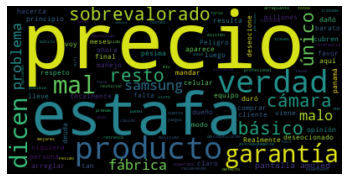

In [ ]:
nltk.download("stopwords")
text1 = " ".join(review for review in negative['content'].astype(str))
text2 = " ".join(review for review in negative['title'].astype(str))
stopwords.update(["teléfono", "href", "solo", "sólo", "día", "buena", "bueno", "bien"])
wordcloud_negativos = wc.WordCloud(stopwords=stopwords).generate(text1+text2)

plt.imshow(wordcloud_negativos, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Importing the NaiveBayesAnalyzer classifier from NLTK
from textblob.sentiments import NaiveBayesAnalyzer
text_general = " ".join(review for review in reviews_co['content'].astype(str))
text_samsung = " ".join(review for review in reviews_co[reviews_co['Marca']=='Samsung']['content'].astype(str))
text_huawei = " ".join(review for review in reviews_co[reviews_co['Marca']=='Huawei']['content'].astype(str))
blob_object_general = TextBlob(text_general, analyzer=NaiveBayesAnalyzer())
blob_object_samsung = TextBlob(text_samsung, analyzer=NaiveBayesAnalyzer())
blob_object_huawei = TextBlob(text_huawei, analyzer=NaiveBayesAnalyzer())
# Running sentiment analysis
analysis_general = blob_object_general.sentiment
analysis_samsung = blob_object_samsung.sentiment
analysis_huawei = blob_object_huawei.sentiment
print(analysis_general)
print(analysis_samsung)
print(analysis_huawei)

Sentiment(classification='pos', p_pos=0.9979497307933736, p_neg=0.0020502692066313006)
Sentiment(classification='pos', p_pos=0.9908892534660183, p_neg=0.009110746533983553)
Sentiment(classification='pos', p_pos=0.8905026098940012, p_neg=0.10949739010599945)


# Conclusions



1. Although there is more supply of used products, users prefer to buy new products.
2. Users prefer to buy products from the Xiaomi brand, which has a very good rating, also in second place of most purchased is the Nokia brand with a low rating, however it has an average price that is very low.
3. The price of the products purchased varies, however there is a concentration around 1,600,000 and products of lower value.
4. The products offered without free shipping are mostly used. Even so, most users who have purchased products without free shipping purchased a new product.
5. The Xiaomi brand is the preferred brand for purchases in this category, followed by Samsung (one of our target brands).
6. The best-selling models of the Samsung and Huawei brands are A32 Dual SIM and Huawei nova 9 SE respectively.
7. In general, there are few negative and neutral comments about Samsung and Huawei.
8. Negative reviews stand out for price, warranty, camera, overpriced, and scam. So it could be said that the few negative comments are aimed at highlighting the high price for poor service.
9. The last script, using the sentiment analysis of the NaiveBayesAnalyzer library, shows that there are few negative comments in general and they are a little more frequent for Xiami phones

